## Import Libraries & Load Dataset

In [1]:
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## German Traffic Sign Dataset

In [2]:
data_train = pd.read_csv("../input/gtsrb-german-traffic-sign/Train.csv")
data_test = pd.read_csv("../input/gtsrb-german-traffic-sign/Test.csv")
data_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [3]:
images_train,images_test = [],[]
for img in data_train["Path"]:
    image = cv2.imread(f"../input/gtsrb-german-traffic-sign/{img}")
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(32,32))
    image = image / 255.0
    images_train.append(image)
for img in data_test["Path"]:
    image = cv2.imread(f"../input/gtsrb-german-traffic-sign/{img}")
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(32,32))
    image = image / 255.0
    images_test.append(image)

In [4]:
X = np.array(images_train)
Y = data_train["ClassId"].values
X_Test = np.array(images_test)
Y_Test = data_test["ClassId"].values

In [5]:
X_Train, X_Val, Y_Train, Y_Val = train_test_split(X,Y,test_size=0.2,random_state=42)

# Model
## CNN

In [11]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(MaxPool2D())
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(256,(3,3),activation="relu"))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(43,activation="softmax"))

In [12]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("Traffic.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [13]:
history = model.fit(X_Train,
                    Y_Train,
                    epochs=50,
                    validation_data=(X_Val,Y_Val),
                    batch_size=32,
                    callbacks=[checkpoint])

Epoch 1/50
981/981 [==============================] - 5s 4ms/step - loss: 1.6845 - accuracy: 0.5069 - val_loss: 0.2225 - val_accuracy: 0.9353
Epoch 2/50
981/981 [==============================] - 4s 4ms/step - loss: 0.2355 - accuracy: 0.9270 - val_loss: 0.0570 - val_accuracy: 0.9847
Epoch 3/50
981/981 [==============================] - 4s 4ms/step - loss: 0.1029 - accuracy: 0.9691 - val_loss: 0.0636 - val_accuracy: 0.9807
Epoch 4/50
981/981 [==============================] - 4s 4ms/step - loss: 0.0751 - accuracy: 0.9792 - val_loss: 0.0267 - val_accuracy: 0.9925
Epoch 5/50
981/981 [==============================] - 4s 5ms/step - loss: 0.0601 - accuracy: 0.9833 - val_loss: 0.0284 - val_accuracy: 0.9923
Epoch 6/50
981/981 [==============================] - 4s 4ms/step - loss: 0.0449 - accuracy: 0.9866 - val_loss: 0.0804 - val_accuracy: 0.9821
Epoch 7/50
981/981 [==============================] - 4s 4ms/step - loss: 0.0415 - accuracy: 0.9882 - val_loss: 0.0312 - val_accuracy: 0.9930
Epoch 

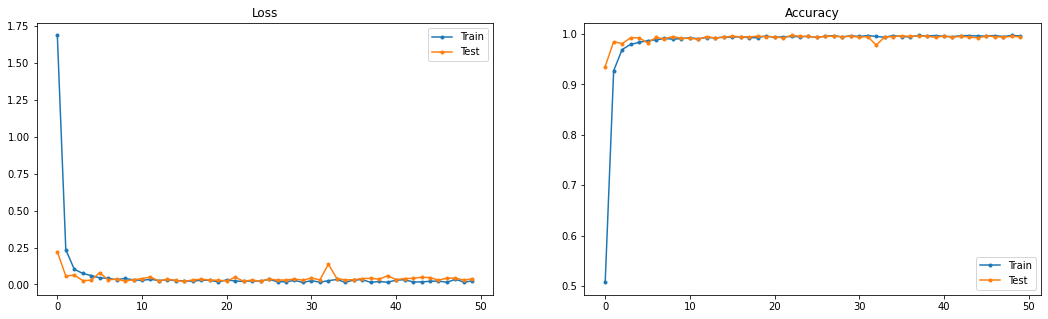

In [14]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()

In [15]:
model.evaluate(X_Test,Y_Test)

395/395 [==============================] - 1s 3ms/step - loss: 0.4323 - accuracy: 0.9637


[0.43231087923049927, 0.9637371301651001]